# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp
from sklearn.ensemble import RandomForestClassifier

In [27]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [30]:
def func_bivariada(df, resposta, explicativas):
    # df = dataframe
    # resposta = variável resposta
    # explicativas = lista de variáveis explicativas, que será percorrida pelo for em list comprehension
    ctab = pd.crosstab([df[col] for col in explicativas], df[resposta])
    return ctab

# Exemplo de uso da função
variavel_resposta = 'flag_doente'
variaveis_explicativas = ['sex', 'cp', 'restecg', 'exang']
bivariada = func_bivariada(df, variavel_resposta, variaveis_explicativas)

# Exiba a tabela de contingência cruzada
bivariada

flag_doente             0   1
sex cp  restecg exang        
0.0 1.0 0.0     0.0     3   0
        2.0     0.0     1   0
    2.0 0.0     0.0    10   0
        2.0     0.0     4   2
                1.0     2   0
    3.0 0.0     0.0    18   1
        1.0     0.0     1   0
        2.0     0.0    13   0
                1.0     2   0
    4.0 0.0     0.0     7   1
                1.0     2   7
        1.0     1.0     0   2
        2.0     0.0     7   7
                1.0     2   5
1.0 1.0 0.0     0.0     1   3
                1.0     1   1
        2.0     0.0     8   3
                1.0     2   0
    2.0 0.0     0.0    17   2
                1.0     1   1
        2.0     0.0     7   4
    3.0 0.0     0.0    18   6
                1.0     4   2
        2.0     0.0    11   7
                1.0     1   2
    4.0 0.0     0.0    10  11
                1.0     3  21
        1.0     0.0     0   1
        2.0     0.0     5  15
                1.0     3  35

#### O cp4 obteve um valor bem alto de flag 1

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [31]:
# local pra TESTES
intervalos = [10]
minimo=10
margem=5
rotulos = [f'{minimo}-{minimo+margem}']
rotulos.append(f'{minimo+1}-{minimo+margem}')
rotulos

['10-15', '11-15']

In [32]:
###################################################################################
def func_bivariada_continua(df, resposta, explicativas, quebras):
    # df = dataframe
    # resposta = variável resposta
    # explicativas = lista de variáveis explicativas, que será percorrida pelo for em list comprehension
    # quebras = número de quebras que a variável continua vai ter
    ''' A margem multiplicada pelo número de quebras é igual a diferença entre minimo e máximo, então
    foi feito intervalos e rotulos baseados nesses valores que servem para qualquer entrada de variável'''
    for var in explicativas:
        minimo = min(df[var])
        maximo = max(df[var])
        margem = round((maximo - minimo) / quebras)
        intervalos = [minimo] # Adicionando o primeiro valor
        rotulos = [f'{minimo}-{minimo+margem}'] # Adicionando o primeiro valor
        '''O iterador foi definido como 1 pois os intervalos precisam ter um número a mais que os 
        rótulos, então a iteração precisa ocorrer quebras-2 vezes, pois o valor minimo e máximo também
        vão entrar na lista'''
        i = 1
        while i < quebras:
            intervalos.append(minimo+margem)
            minimo = minimo + margem
            rotulos.append(f'{minimo+1}-{minimo+margem}')
            i+=1
        intervalos.append(maximo) # Adicionando o ultimo elemento
        ''' Criando uma nova coluna com a palavra range na frente, essa coluna terá um intervalo de 
        valores definidos por intervalos e rotulos'''
        df[f'{var} range'] = pd.cut(df[var], bins=intervalos, labels=rotulos)
    ''' Finalmente criado o crosstab com as novas colunas criadas usando o range na frente do nome
    da variável, como feito no looping anterior'''
    ctab = pd.crosstab([df[col+ ' range'] for col in explicativas], df[resposta], margins=True)
    return ctab
###################################################################################
variavel_resposta = 'flag_doente'
variaveis_explicativas = ['age', 'trestbps']
bivariada = func_bivariada_continua(df, variavel_resposta, variaveis_explicativas, 5)
bivariada


flag_doente                 0    1  All
age range trestbps range               
29.0-39.0 116.0-136.0       5    4    9
          137.0-157.0       4    0    4
40.0-49.0 94.0-115.0       14    8   22
          116.0-136.0      27   10   37
          137.0-157.0       9    4   13
50.0-59.0 94.0-115.0       10    8   18
          116.0-136.0      34   27   61
          137.0-157.0      17   14   31
          158.0-178.0       3    8   11
          179.0-199.0       0    3    3
60.0-69.0 94.0-115.0        4    4    8
          116.0-136.0      11   19   30
          137.0-157.0      12   20   32
          158.0-178.0       4    5    9
          179.0-199.0       1    1    2
70.0-79.0 94.0-115.0        2    0    2
          116.0-136.0       1    2    3
          137.0-157.0       2    1    3
          158.0-178.0       1    1    2
All                       161  139  300

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [33]:
# Separando os dados em treinamento e teste com as variáveis descritas no enunciado 3
X = df[['sex', 'cp', 'trestbps', 'age']]
y = df['flag_doente']
# 25% dos dados para teste e 75% será para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

modelo_logistic = LogisticRegression() # Criando modelo
modelo_logistic.fit(X_train, y_train) # Treinando modelo com dados de treino
predict = modelo_logistic.predict(X_test) # Fazendo predição com dados de teste
acuracia = accuracy_score(y_test, predict)
acuracia


0.8289473684210527

In [34]:
'''
bivariada['Odds'] = bivariada[1] / bivariada[0]
odds_all = bivariada.loc['All', 'Odds']
bivariada['Odds Ratio'] = bivariada['Odds'] / bivariada.loc['All', 'Odds']
teste = bivariada['Odds'][0] / odds_all
odds_ratio = 
'''

''' Acima deixei a lógica que estava tentando usar como no exercício anterior, porém como minha tabela
de contingencia tem muitas quebras e alguns valores são zero, isso complicou a obtenção do OddsRatio, 
então pressegui da maneira abaixo, que achei muito mais prático.'''
coeficientes = modelo_logistic.coef_[0] # Obtem os coeficientes na escala logarítmica
odds_ratio = np.exp(coeficientes) # Transformando em valores reais, fora do logaritimo
resultado = pd.DataFrame({'Coeficiente': coeficientes, 'Odds Ratio': odds_ratio}, index=X.columns)
resultado

,Coeficiente,Odds Ratio
sex,1.555184,4.735960
cp,0.994929,2.704532
trestbps,0.019151,1.019336
age,0.054124,1.055616


No resultado acima mostra que homens no geral tem 4.73 vezes chance de ficar doente em relação a mulheres.
Para cp, tipo de dor no peito(chest pain), o valor de referência foi o primeiro sendo 2.704 vezes maior que a segunda categoria.

Para cada aumento de idade, a chance de se ficar doente aumenta em 1.05 vezes.
O trestbps que é referênte a pressão arterial, para cada unidade aumentada a chance de ficar doente aumenta em 1.019 vezes

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

#### Calculando probabilidade de evento

In [35]:
df_calibrado = X.copy()
probabilidades_previstas = modelo_logistic.predict_proba(df_calibrado) # Salvando as probabilidades de ocorrer e não ocorrer evento
probabilidade_evento_predita = probabilidades_previstas[:, 1] # Pegando a segunda coluna, que tem as prob de ocorrer evento
df_calibrado['probabilidade doente'] = probabilidade_evento_predita # Criando nova coluna
''' Adicionando coluna da flag para comparar, essa coluna só pode ser adicionada depois de calcular
as probabilidades porque o predict_proba só funciona se o DF estiver igual as colunas usadas no modelo.'''
df_calibrado['flag_doente'] = df['flag_doente']
df_calibrado

,sex,cp,trestbps,age,probabilidade doente,flag_doente
0,1.0,1.0,145.0,63.0,0.232963,0
1,1.0,4.0,160.0,67.0,0.908620,1
2,1.0,4.0,120.0,67.0,0.822130,1
3,1.0,3.0,130.0,37.0,0.289813,0
4,0.0,2.0,130.0,41.0,0.038056,0
...,...,...,...,...,...,...
298,1.0,1.0,110.0,45.0,0.055400,1
299,1.0,4.0,144.0,68.0,0.885401,1
300,1.0,4.0,130.0,57.0,0.765149,1
301,0.0,2.0,130.0,57.0,0.085965,1


#### Categorizando em 5 grupos, abaixo deixei também o código usado no exemplo da aula, porém é o mesmo resultado do cut_prob_5

In [36]:
# Categorizando em 5 grupos
cut_prob_5 = pd.qcut(df_calibrado['probabilidade doente'], 5, duplicates='drop')
cut_prob_5.value_counts().sort_index()

(0.0201, 0.179]    61
(0.179, 0.362]     60
(0.362, 0.563]     61
(0.563, 0.743]     60
(0.743, 0.909]     61
Name: probabilidade doente, dtype: int64

In [37]:
group_reg = df_calibrado.groupby(cut_prob_5)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
probabilidade doente,
"(0.0201, 0.179]",61
"(0.179, 0.362]",60
"(0.362, 0.563]",61
"(0.563, 0.743]",60
"(0.743, 0.909]",61


#### Calculando a probabilidade de evento médio por grupo

In [38]:
qualid['probabilidade doente'] = group_reg['probabilidade doente'].mean()
qualid

,contagem,probabilidade doente
probabilidade doente,,
"(0.0201, 0.179]",61,0.099428
"(0.179, 0.362]",60,0.277168
"(0.362, 0.563]",61,0.465014
"(0.563, 0.743]",60,0.655338
"(0.743, 0.909]",61,0.812049


#### Taxa de eventos por grupo

In [39]:
qualid['pct doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,probabilidade doente,pct doente
probabilidade doente,,,
"(0.0201, 0.179]",61,0.099428,0.098361
"(0.179, 0.362]",60,0.277168,0.183333
"(0.362, 0.563]",61,0.465014,0.475410
"(0.563, 0.743]",60,0.655338,0.700000
"(0.743, 0.909]",61,0.812049,0.836066


#### Gráfico do valor esperado Vs Observado por grupo

Text(0.5, 0, 'Grupo')

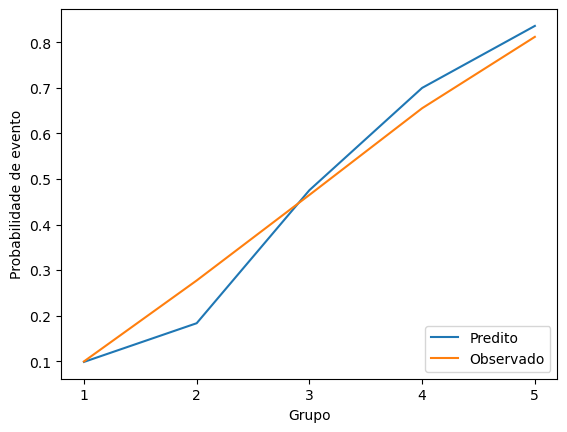

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = qualid['pct doente'].plot(label='Predito')
ax = qualid['probabilidade doente'].plot(label='Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc='lower right')
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [41]:
# A acuracia já tinha calculado logo ao ter feito o modelo no exercício 3

probabilidades_previstas = modelo_logistic.predict_proba(X_test) # Obtendo probabilidades do teste
probabilidade_evento_predita = probabilidades_previstas[:, 1] # Pegando a coluna de evento True
gini = 2 * roc_auc_score(y_test, probabilidade_evento_predita) -1

probabilidades_positivas = probabilidades_previstas[y_test == 1][:, 1]
probabilidades_negativas = probabilidades_previstas[y_test == 0][:, 1]
ks, ks_p_value = ks_2samp(probabilidades_positivas, probabilidades_negativas)
print(f'Acurácia: {acuracia}\nGini: {gini}\nKS: {ks}')




Acurácia: 0.8289473684210527
Gini: 0.7156794425087107
KS: 0.7066202090592334


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

#### Vou criar um modelo de classificação com árvore para verificar a importância das features

In [42]:
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X, y)
importancia = modelo_rf.feature_importances_
feature_names = X.columns.tolist()

importancia_dic = {}
i=0
while i < len(importancia):
    importancia_dic[feature_names[i]] = importancia[i]
    i+=1
    
importancia_dic


{'sex': 0.08147400849467089,
 'cp': 0.2771391683772837,
 'trestbps': 0.2939789110842998,
 'age': 0.34740791204374566}

#### Fazendo a remoção da coluna com menor valor de importância para tirar as novas estimativas

In [43]:
X.drop(columns = ['sex'], inplace = True)
X

C:\Users\Bill_\AppData\Local\Temp\ipykernel_5856\2272096073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns = ['sex'], inplace = True)


,cp,trestbps,age
0,1.0,145.0,63.0
1,4.0,160.0,67.0
2,4.0,120.0,67.0
3,3.0,130.0,37.0
4,2.0,130.0,41.0
...,...,...,...
298,1.0,110.0,45.0
299,4.0,144.0,68.0
300,4.0,130.0,57.0
301,2.0,130.0,57.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

modelo_logistic = LogisticRegression() # Criando modelo
modelo_logistic.fit(X_train, y_train) # Treinando modelo com dados de treino
predict = modelo_logistic.predict(X_test) # Fazendo predição com dados de teste
acuracia = accuracy_score(y_test, predict)

probabilidades_previstas = modelo_logistic.predict_proba(X_test) # Obtendo probabilidades do teste
probabilidade_evento_predita = probabilidades_previstas[:, 1] # Pegando a coluna de evento True
gini = 2 * roc_auc_score(y_test, probabilidade_evento_predita) -1

probabilidades_positivas = probabilidades_previstas[y_test == 1][:, 1]
probabilidades_negativas = probabilidades_previstas[y_test == 0][:, 1]
ks, ks_p_value = ks_2samp(probabilidades_positivas, probabilidades_negativas)
print(f'Acurácia: {acuracia}\nGini: {gini}\nKS: {ks}')

Acurácia: 0.75
Gini: 0.6097560975609757
KS: 0.5686411149825784


#### Conclusões

Acurácia: Após a remoção da variável sex, mesmo sendo a de menor relevância, houve uma diminuição da acurácia, o que indica que a variável estava contribuindo positivamente para a explicação do modelo. Sendo o ideal ao remover ou adicionar variáveis novos calculos ded acurária a cada alteração afim de procurar o ponto ótimo.

Gini: O Gini também teve um declinio, assim como a acurácia a remoção da variável sex atrapalhou para que o modelo pudesse separar melhor o evento do não evento. (doente ou não doente)

KS: Similar ao gini, a redução do KS também indica que o modelo piorou após a remoção da variável sex, atrapalhando a capacidade de discriminação do modelo.